In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
base = pd.read_csv('../data/microdados_enem2021v2.csv')
pd.set_option('display.max_rows', 100)
base.head()

,TP_FAIXA_ETARIA,TP_ESCOLA,TP_ENSINO,RENDA_FAM,CELULAR,COMPUTADOR,INTERNET,NOTA
0,5,1,0,3,1,1,1,baixa
1,12,1,0,1,2,0,0,media
2,3,2,1,1,1,1,1,media
3,2,2,1,2,4,1,1,media
4,9,1,0,2,2,0,1,baixa


In [158]:
base['TP_FAIXA_ETARIA'].replace({1:'<17',2:'17',3:'18',4:'19',5:'20', 
                                 6:'21',7:'22',8:'23',9:'24',10:'25', 
                                 11:'26..30',12:'31..35',13:'36..40',
                                 14:'41..45',15:'46..50',16:'51..55',
                                 17:'56..60',18:'61..65',19:'66..70',
                                 20:'>70'}, inplace = True)

In [159]:
base['TP_ESCOLA'].replace({1:'DESCONHECIDA', 2:'PUBLICA', 3:'PRIVADA'}, inplace = True)

In [160]:
base['TP_ENSINO'].replace({0:'DESCONHECIDO', 1:'REGULAR', 2:'SUBSTITUTIVO'}, inplace = True)

In [161]:
base['RENDA_FAM'].replace({0:'A',1:'B',2:'C',3:'D',4:'E',
                           5:'F',6:'G',7:'H',8:'I',9:'J',
                           10:'K',11:'L',12:'M',13:'N',
                           14:'O',15:'P',16:'Q'}, 
                          inplace = True)

In [162]:
base['CELULAR'].replace({0:'NAO',1:'SIM',2:'SIM',3:'SIM',4:'SIM'}, inplace = True)

In [163]:
base['COMPUTADOR'].replace({0:'NAO',1:'SIM',2:'SIM',3:'SIM',4:'SIM',5:'SIM'}, inplace = True)

In [164]:
base['INTERNET'].replace({0:'NAO',1:'SIM'}, inplace = True)

In [165]:
base['NOTA'] = base['NOTA'].str.upper()

In [166]:
base.head()

,TP_FAIXA_ETARIA,TP_ESCOLA,TP_ENSINO,RENDA_FAM,CELULAR,COMPUTADOR,INTERNET,NOTA
0,20,DESCONHECIDA,DESCONHECIDO,D,SIM,SIM,SIM,BAIXA
1,31..35,DESCONHECIDA,DESCONHECIDO,B,SIM,NAO,NAO,MEDIA
2,18,PUBLICA,REGULAR,B,SIM,SIM,SIM,MEDIA
3,17,PUBLICA,REGULAR,C,SIM,SIM,SIM,MEDIA
4,24,DESCONHECIDA,DESCONHECIDO,C,SIM,NAO,SIM,BAIXA


In [170]:
def graphicGenerator(index, hue, figsize, style, titleA, titleB, yLabel, xLabel):

    if index == 'TP_FAIXA_ETARIA':
        # Gráfico A
        plt.figure(figsize = (10,10))
        sns.set_theme(style = style)
        top_10 = base[index].value_counts()[:10].index
        sns.countplot(x=index, order=top_10, data=base, linewidth=0)
        plt.title(titleA)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        plt.xticks(rotation = 45)
        # Gráfico B
        plt.figure(figsize = (10,10))
        sns.set_theme(style = style)
        sns.countplot(x=index, hue=hue, order=top_10, data=base, linewidth=0)
        plt.title(titleB)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)

    elif index == 'RENDA_FAM':
        # Gráfico A
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        top_renda = base.groupby(index).size().index
        sns.countplot(x=index, order=top_renda, data=base)
        plt.title(titleA)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        # Gráfico B
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        sns.countplot(x=index, hue=hue, order=top_renda, data=base, linewidth=0)
        plt.title(titleB)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        
    else:
        # Gráfico A
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        sns.countplot(x=index, data=base)
        plt.title(titleA)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        # Gráfico B
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        sns.countplot(x=index, hue=hue, data=base)
        plt.title(titleB)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)

In [168]:
indexes = pd.DataFrame(base.columns).drop([7]).rename(columns = {0:'INDEXES'})
indexes

,INDEXES
0,TP_FAIXA_ETARIA
1,TP_ESCOLA
2,TP_ENSINO
3,RENDA_FAM
4,CELULAR
5,COMPUTADOR
6,INTERNET


-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
                      0
INTERNET NOTA          
NAO      ALTA       775
         BAIXA   119362
         MEDIA    55750
SIM      ALTA     94120
         BAIXA   702068
         MEDIA  1074931
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
0.44% dos participantes que NÃO possuem INTERNET obtiveram nota alta.
5.03% dos participantes que POSSUEM INTERNET obtiveram nota alta.
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-


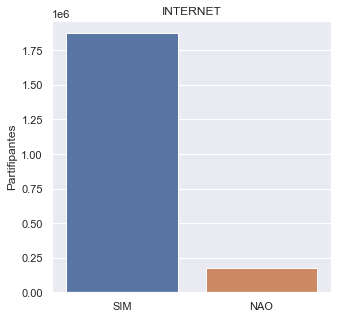

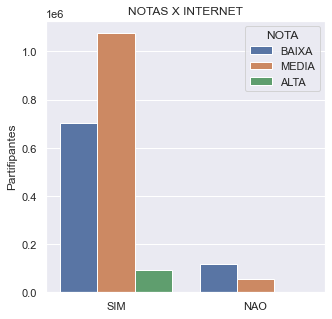

In [172]:
inputIndex = int(input('Input Index'))
index = base.columns[inputIndex]

comparacao = pd.DataFrame(base.groupby([index, 'NOTA']).size())
print('-=-'*25)
print(comparacao)

if index != 'TP_FAIXA_ETARIA':

    if index == 'TP_ESCOLA':
        tipo1 = 'PRIVADA'
        tipo2 = 'PUBLICA'
        msg1 = 'do {} PUBLICA'.format(index)
        msg2 = 'do {} PRIVADA'.format(index)

    elif index == 'TP_ENSINO':
        tipo1 = 'REGULAR'
        tipo2 = 'SUBSTITUTIVO'
        msg1 = 'do {} REGULAR'.format(index)
        msg2 = 'do {} SUBSTITUTIVO'.format(index)

    elif index == 'RENDA_FAM':
        tipo1 = 'B'
        tipo2 = 'Q'
        msg1 = 'de {} de ATÉ R$1.100,00'.format(index)
        msg2 = 'de {} ACIMA DE R$22.000,00'.format(index)

    else:
        tipo1 = 'NAO'
        tipo2 = 'SIM'
        msg1 = 'que NÃO possuem {}'.format(index)
        msg2 = 'que POSSUEM {}'.format(index)

    c1 = list(comparacao.loc[tipo1].values)
    c2 = list(comparacao.loc[tipo2].values)
    sumC1 = int(c1[0]+c1[1]+c1[2])
    sumC2 = int(c2[0]+c2[1]+c2[2])
    c1 = float(c1[0]*100/sumC1)
    c2 = float(c2[0]*100/sumC2)

    print('-=-'*25)
    print('{:.2f}% dos participantes {} obtiveram nota alta.'.format(c1, msg1))
    print('{:.2f}% dos participantes {} obtiveram nota alta.'.format(c2, msg2))
    print('-=-'*25)

graphicGenerator(index=index, hue = 'NOTA', figsize=(5,5), style='darkgrid', titleA=index, 
                 titleB='NOTAS X '+index, yLabel='Partifipantes', xLabel='')